In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
from sklearn.preprocessing import scale

In [258]:
df = pd.read_csv('./assets/bra.csv')
#df = df.dropna()

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  2279 non-null   object 
 1   League   2279 non-null   object 
 2   game_id  2279 non-null   int64  
 3   Season   2279 non-null   int64  
 4   Date     2279 non-null   object 
 5   Time     2279 non-null   object 
 6   Home     2279 non-null   object 
 7   home_id  2279 non-null   int64  
 8   Away     2279 non-null   object 
 9   Away_id  2279 non-null   int64  
 10  HG       2279 non-null   int64  
 11  AG       2279 non-null   int64  
 12  Res      2279 non-null   int64  
 13  PH       2279 non-null   float64
 14  PD       2279 non-null   float64
 15  PA       2279 non-null   float64
 16  MaxH     2279 non-null   float64
 17  MaxD     2279 non-null   float64
 18  MaxA     2279 non-null   float64
 19  AvgH     2279 non-null   float64
 20  AvgD     2279 non-null   float64
 21  AvgA     2279 

In [260]:
"""df['result'] = [x for x in range(len(df))]

for c in range(len(df)):
    if df.gols_mandante[c] < df.gols_visitante[c]:
        df.result[c] = 1
    elif df.gols_mandante[c] > df.gols_visitante[c]:
        df.result[c] = 2
    else:
        df.result[c] = 0"""

"df['result'] = [x for x in range(len(df))]\n\nfor c in range(len(df)):\n    if df.gols_mandante[c] < df.gols_visitante[c]:\n        df.result[c] = 1\n    elif df.gols_mandante[c] > df.gols_visitante[c]:\n        df.result[c] = 2\n    else:\n        df.result[c] = 0"

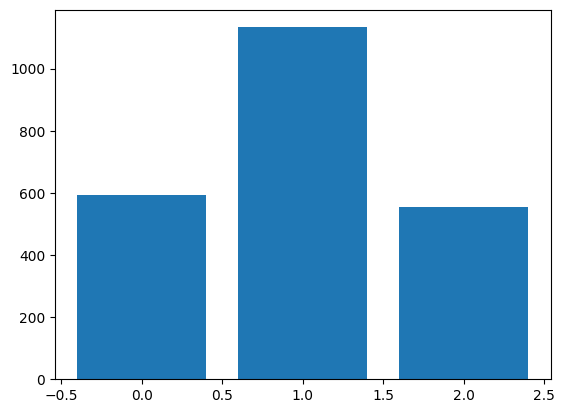

In [261]:
from collections import Counter

count = Counter(df['Res'])

plt.bar(count.keys(), count.values())
plt.show()


In [262]:
# Pre-features

features = df.drop(columns=['Res', 'Country', 'League', 'game_id', 'Season',
                             'Date', 'Time', 'Home', 'home_id', 'Away', 'Away_id', 
                             'HG', 'AG' ], axis = 1)
labels = df.Res

features.head()

,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [263]:
# Selecionando as melhores features
features_list = tuple(col for col in features)

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_

raw_pairs = zip(features_list, k_best_features_scores)
ordered_pairs = tuple(reversed(sorted(raw_pairs, key=lambda x: x[1])))

print(dict(ordered_pairs))


{'AvgH': 85.13375732019617, 'PH': 81.51748572743963, 'MaxH': 80.67054047107476, 'AvgA': 70.41347281316419, 'MaxA': 68.70262760245139, 'PA': 63.290872018071454, 'AvgD': 42.341048163891536, 'PD': 40.62018755299711, 'MaxD': 40.54491193487282}


In [264]:
# Normalização

scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print(features_scale)

[[0.07051282 0.18913043 0.21853547 ... 0.08239095 0.15945946 0.26920093]
 [0.20897436 0.08695652 0.0715103  ... 0.22778675 0.08648649 0.08921645]
 [0.05128205 0.22826087 0.30263158 ... 0.06623586 0.20540541 0.32660978]
 ...
 [0.02307692 0.51521739 0.41647597 ... 0.03069467 0.50540541 0.48875097]
 [0.02051282 0.49130435 0.50171625 ... 0.02423263 0.51351351 0.60822343]
 [0.13717949 0.13043478 0.10526316 ... 0.15831987 0.13783784 0.14041893]]


In [265]:
#Separando o dataset em teste e treino

X_train = features_scale[:1932]
X_test = features_scale[1932:2155]
y_train = labels[:1932]
y_test = labels[1932:2155]

print(len(X_train), len(X_test))

1932 223


In [270]:
# Treinamento com regressão logística

clf_LR = LogisticRegression(multi_class='multinomial', max_iter=2000)
clf_LR.fit(X_train, y_train)
pred = clf_LR.predict(X_test)

lg_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='micro')

print(f'Acurácia: {lg_acc}')
print(f'F1: {f1}')

Acurácia: 0.4170403587443946
F1: 0.4170403587443946


In [271]:
previsao=features_scale[2155:]

game_id_full=df['game_id']
game_id=game_id_full[2155:]

res_full=df['Res']
res=res_full[2155:]


pred=clf_LR.predict(previsao)

data=pd.DataFrame({'real': res, 'previsao':pred, 'game_id':game_id})

print(data)

      real  previsao  game_id
2155     1         1     2156
2156     1         1     2157
2157     2         1     2158
2158     1         2     2159
2159     1         1     2160
...    ...       ...      ...
2274     0         1     2275
2275     0         1     2276
2276     1         1     2277
2277     1         1     2278
2278     2         1     2279

[124 rows x 3 columns]


<Axes: xlabel='previsao', ylabel='real'>

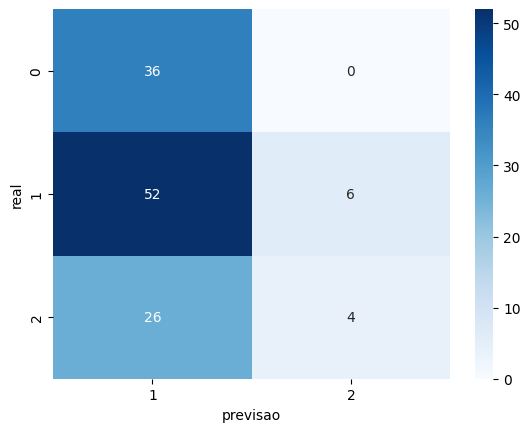

In [272]:
data=pd.DataFrame(data,columns=['real','previsao' ])

cf_matrix=pd.crosstab(data['real'], data['previsao'], rownames=['real'] , colnames=['previsao'])

sns.heatmap(cf_matrix, annot=True, cmap='Blues')